# CPEN400D Deep Learning

Instructors: Brad Quinton, Scott Chin

# Assignment 1: Introductions, Logistic Regression, Gradient Descent

Welcome to your first assignment!  In this assignment we will introduce the development tools that you will use throughout the course.  Then we will dive in to build a complete Logistic Regression system that you will then use to train on data used to detect defects in chips.

After this assignment you will:

- Be able to use various practical tools used in Deep Learning implementations such as Python, Jupyter Notebooks, NumPy, matplotlib.
- Be able to use NumPy to work with arrays, use its various functions, and uses its various mechanisms such as vectorization and Broadcasting.
- Have built a complete Logistic Regression system that can be used to train on data of any number of features!
- Have explored some of the considerations when training (e.g. choosing hyperparameters)
- Have explored qualitative and quantitative techniques for assessing the quality of your trained model


## 0. Completing Your Assignment

Your assignment will be graded based on your implementation and completion of specific code cells within this Jupyter Notebook.  We will introduce what Jupyter Notebooks and code cells are in the next section.  

The code cells that you need to complete will start with the following text:

**\# GRADED FUNCTION:**

Only these cells will be extracted and graded.  Furthermore, within these code cells will be comments 

**\### START CODE HERE ###** and **\### END CODE HERE ###**

Write your code **between** these comments!  Do **NOT** change any of the code outside of these comments! In these comments, we will also estimate the number of lines of code that you will need to write. We don't check line count, but if you find yourself going significantly beyond these suggestions, you may consider rethinking your approach.

To submit your assignment, download the notebook by going to the *File* menu of the Jupyter menu bar above, select *Download As*, and choose the *Notebook (.ipynb)* format. Then upload this file through Canvas.

Please also edit the following code cell to include your name and student number.  Thank you!

In [4]:
# Student Name: Alessandro Narciso
# Student Number: 29627156

## 1. Development Environment

Let's first review the development environment, programming language, and packages that you will be using throughout this course's assignments.  Some of you may already have experience with some of these components, but it is absolutely ok if you do not. 


### 1.1 Python

Python is the most commonly used programming language in the field of Deep Learning. The assignments in this course will use Python (version 3).  We will assume you have the following understanding of Python:

- Basic datatypes (ints, floats, strings, booleans) and how to manipulate them
- Builtin container types (e.g. lists, dicts, sets, tuples) and how to manipulate them (e.g. iteration, indexing, slicing, comprehension)
- Basic flow control (loops, conditionals, etc.)
- Using and declaring functions
- Basic understanding of Classes and how to instantiate and work with objects
- Importing packages and modules

If you haven't used Python before, don't worry. You will be able to get up to speed very quickly based on the programming experience you have acquired in your engineering program.  There are plenty of good tutorials online. 

[Official Documentation](https://docs.python.org/3.6/)



### 1.2. Jupyter Notebooks

Jupyter Notebooks (formerly iPython Notebooks) are documents that run in your web browser to produce an interactive computational environment. These notebooks contain *cells* that may contain executable code, or rich media elements (encoded in  [Markdown](https://en.wikipedia.org/wiki/Markdown)) such as text, figures, equations, etc.

#### 1.2.1 Running a Cell

Executing the code in a cell can be done by pressing SHIFT+ENTER.  Or you can click the *Run* button in the Jupyter menu up top. You can try running the following cell now



In [5]:
print("Hello World")

a = 10
b = 20
print(a+b)

Hello World
30


#### 1.2.2 The Kernel

When a Jupyter notebook is opened, its “computational engine” (called the kernel) is automatically started. Each time you run a cell, it is executed by the kernel. You can think of the kernel as sequential program that runs the cells based on the order in which you execute them.  This means you can jump around the notebook and run the cells in a different order than how they are presented.  This also means that variables and functions declared in one executed cell, will reside in the kernel's memory and you can reference it in another cell.  For example, in the previous code cell we declared two Python variables named "a" and "b".  If you run the following cell, you can see that they are still in the kernel's memory.


In [6]:
print(a)
print(b)

10
20


To help you keep track of the order in which you executed the cells, you can refer to the text to the left of each code cell which looks like "In [  ]".  Once the cell has run, a number will appear in the brackets.  When no number is there, it means the cell has never been run.  If you see an asterisk * in the bracket, it means the cell is currently executing.

You can interrupt a running cell by either clicking the square shaped "Stop" button in the Jupyter menu above, or going to the "Kernel" menu and then selecting "Interrupt".

Closing the browser does **not** close the kernel. To truly stop it, you need to go to the "File" menu and select "Close and Halt".  More commonly, you will want to reset your Kernel and to run again from scratch. This doesn't revert or change any of the code in the cells in your notebook, it just simply restarts clears the kernel's memory. To reset the kernel, go to the "Kernel" menu, and select one of the restart options.

For more info on the kernel, see the [official docs](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/execute.html)

### 1.3 NumPy

NumPy is the core package for scientific computing in Python. It adds support for large, multi-dimensional matrices, along with a large collection of high-level mathematical functions to operate on these arrays efficiently.

We do not expect you to have any experience with NumPy. At this point in the assignment, you should familiarize yourself with how to create and manipulate NumPy matrices.  We suggest reviewing the section *The Basics* from the official [NumPy tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html).  If you have experience with Matlab, you may also want to review this article on [NumPy for Matlab Users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html).

Run the following code to see some of the basics of working with NumPy arrays.

In [7]:
# Import the numpy package. It's common practice to import
# the packing into an abbreviated identifier called np
import numpy as np

# Create a 3x2 array
x = np.array([(1, 2), 
              (3, 4), 
              (5, 6)])

# NumPy arrays are objects of a class named ndarray
print(type(x))

# ndarray objects have a property to inspect the dimensions of the array
print(x.shape)

# Index into a specific element. Note the use of comma to
# delimit the indices.
print(x[2, 0])

<class 'numpy.ndarray'>
(3, 2)
5


### 1.4 Matplotlib

Matplotlib is a plotting library for Python and NumPy that produces publication-quality figures.  We will be using it to help us visualize our data. This is another package worth learning for industry use.  You can read more about it at the official [Matplotlib website](https://matplotlib.org/)

## 2. Implementing Logistic Regression

The core part of this assignment will be to implement Python code to describe, train, and use for prediction a Logistic Regression model. 

Recall the equation for the Logistic Regression:

$$a = \sigma(Wx + b)$$

- $x$ is the input vector with $n$ features
- $w$ is the vector of $n$ learned parameters of the model
- $b$ is the learned bias parameter of the model
- $\sigma$ is the Sigmoid activation function
- $a$ is the binary prediction output

We will step you through each part of this task, and discuss various practical aspects along the way. Let's get started!

### 2.1 Implementing the Sigmoid Function

We will start by implementing a Python function to compute the Sigmoid function.  We will use this opportunity to introduce the concept of Vectorization.  

A common situation in Deep Learning is that you want to apply the same operation to each element of a vector (or matrix).  The most obvious way to do this is to use a Python loop to iterate over each element of the vector, and then apply the operation to each element. However, this is not efficient.  With modern hardware and software frameworks, it is possible to apply the operation to all elements in the entire vector simultaneously in parallel and/or in a much more optimized way.  This leads to faster execution of the code.  Fast runtime becomes important in Deep Learning as we work with massive datasets, and need to run many iterations of our optimization algorithm (e.g. Gradient Descent) to train our networks. 

In this section, we will first create a non-vectorized implementation of the Sigmoid function, followed by a vectorized version (which we will ultimately use in our Logistic Regression implementation), and compare their runtimes.

First, recall that the Sigmoid function is defined as follows: 
$$\sigma(x) = \frac{1}{1+e^{-x}}$$


#### 2.1.1 Non-vectorized Sigmoid Function

Complete the following code to implement a Python function that takes a single int or float, and computes and returns the application of the Sigmoid function.  

**Hint**: Use the math.exp() function

In [8]:
# GRADED FUNCTION: non_vectorized_sigmoid

import math

def non_vectorized_sigmoid(x):
    """ A non-vectorized implementation of the Sigmoid Function
    
    Inputs:
        x -- A single float or int
        
    Returns:
        A float for the Sigmoid function applied to x
    """
    ### START CODE HERE ### (~1-3 lines of code)
    s = 1/(1 + math.exp(-x))
    ### END CODE HERE ###

    return s

Run the following cell to test your non-vectorized Sigmoid function:

In [9]:
# Expected output: 0.7310585...
print(non_vectorized_sigmoid(1))

# Expected output: 0.5
print(non_vectorized_sigmoid(0))

# Try to run on a NumPy array
# This will not work and will raise an error.
# See if you can understand how the error traceback 
# points you to the line of offending code.
x = np.array([1,2,3])
print(non_vectorized_sigmoid(x))


0.7310585786300049
0.5


TypeError: only size-1 arrays can be converted to Python scalars

#### 2.1.2 Vectorized Sigmoid function

In the last section, we saw that the functions in the *math* library don't support NumPy arrays. Fortunately, the Numpy package provides math operations that do. These functions typically operate on single float and ints as well. To implement a vectorized version of our Sigmoid function, we simply need to use NumPy's version of the *exp()* function.  

We won't get into the details of how NumPy's exp() function (and it's other vectorized functions) actually work under-the-hood, but the gist is that there are two things happening.  First, the NumPy functions have low-level optimized pre-compiled implementations (e.g. using the C language) which will be faster than using native-Python loops to iterate across all elements.  Second, these low-level implementations abstract away, and manage hardware resource utilization to make the most out of any parallel processing capabilties of the hardware.  From the developer's (your) perspective, it looks like the operation is applied to all elements at once because you simply pass the exp() function the entire NumPy array, and it returns a NumPy array of the same size with the results of applying exp() to each element. This abstraction also has the benefit of making your code easier to understand.

Complete the implementation of the following code to create a vectorized version of the Sigmoid function:

**Hint**: Use [np.exp()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html)

In [10]:
# GRADED FUNCTION: sigmoid

def sigmoid(x):
    """ A vectorized implementation of the Sigmoid Function
    
    Inputs:
        x -- A NumPy array, or a single float or int
        
    Returns:
        A NumPy array forthe Sigmoid function applied to x
    """
        
    ### START CODE HERE ### (~1-3 lines of code)
    s = 1/(1 + np.exp(-x))
    ### END CODE HERE ###

    return s

Run the following cell to test your vectorized Sigmoid function:

In [11]:
# Expected output: 0.7310585...
print(sigmoid(1))

# Expected output: 0.5
print(sigmoid(0))

# Expected output: [0.73105858 0.88079708 0.95257413]
x = np.array([1,2,3])
print(sigmoid(x))


0.7310585786300049
0.5
[0.73105858 0.88079708 0.95257413]


#### 2.1.3 Comparing performance of Vectorized implementation

Let's compare the runtime of the non-vectorized and vectorized implementations of Sigmoid on a vector with 100,000 elements (this is a small number in terms Deep Learning applications, but is sufficient for demonstration). In the following code, we don't bother saving the results since we just want to measure the runtime.

**Note**: It's difficult to get accurate runtime results in this fashion because of other processes currently running on the server (e.g. other students working on their assignment).  But for this example, you should see 10-20x faster runtime for the vectorized implementation.  In other cases of vectorization, you may achieve even greater speedups!


In [12]:
# We will use the time() function to measure runtime
import time

# Create a random input vector
x = np.random.rand(100000)

# The Non-vectorized Implementation which requires using
# a loop
t0 = time.time()
for elem in x:
    non_vectorized_sigmoid(elem)
t1 = time.time()

# The Non-vectorized Implementation which accepts the
# entire NumPy array
sigmoid(x)
t2 = time.time()

# Now print the runtime results
print('Non-vectorized runtime in seconds: {0}'.format(t1-t0))
print('Vectorized runtime in seconds:     {0}'.format(t2-t1))


Non-vectorized runtime in seconds: 0.05301022529602051
Vectorized runtime in seconds:     0.004232645034790039


### 2.2 Initializing Parameters

Recall that in Logistic Regression, we have a parameter vector $W$ that is equal in size to the number of features $n$, and a single bias parameter, $b$.

We will now write a function that initializes these parameters with zeros, and returns them.  Complete the following code. Make sure you create an array that is explicitly sized to be an n-x-1 array for $W$. Note, from here on out, we will use parentheses to denote the dimensions of an array.  So $W$ will be an array with shape (n,1).

**Hint**: You may want to use the [np.zeros()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.zeros.html) function. 

**Notes**: As you work with more complex matrices in Deep Learning implementations, it can be useful to use Python assertions to check the dimensions of the matrices that you create. Common programming mistakes such as accidentally switching the dimension sizes can be caught early this way.  See the assertions already included in the code below.

In [13]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n):
    """ Initialize the parameters with zeros for Logistic Regression
    
    Inputs:
        n: An int for number of input features
        
    Returns:
        NumPy Array: the W parameter vector of shape (n, 1)
        float: the b bias paramter
    """
    ### START CODE HERE ### (≈ 2 line of code)
    w = np.zeros((n,1))
    b = 0.0
    ### END CODE HERE ###
    
    assert(w.shape == (n, 1))
    assert(isinstance(b, float))
    
    return w, b

In [14]:
w, b = initialize_parameters(6)

# Expected output: (6, 1)

print(w.shape)

# Expected output:
# [[0.]
#  [0.]
#  [0.]
#  [0.]
#  [0.]
#  [0.]]
print(w)

# Expected output:
# 0.0
print(b)


(6, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]
0.0


### 2.3 Some NumPy Concepts

#### 2.3.1 Vectors in NumPy

Strictly speaking, a (1, n) NumPy array, and an (n, 1) NumPy array are both 2-dimensional matrices.  But practically speaking, they can also be regarded as a row vector and a column vector, respectively. A (n, ) NumPy array has only one dimension and is both strictly and practically a vector. This is stumbling block for many people new to NumPy so keep it in mind! It matters when you are trying to perform operations between these two kinds of vectors, and dimensions are importent (e.g. matrix multiply). Furthermore, a NumPy array can have zero dimensions () which is interpreted as a scalar.

Here are some examples of these scenarios in code.

In [15]:
# Creating some zero vectors of size 10
n = 10

col_vector = np.zeros((n, 1))
row_vector = np.zeros((1, n))
vector = np.zeros(n)

print('Shape of col_vector: {0}'.format(col_vector.shape))
print('Shape of row_vector: {0}'.format(row_vector.shape))
print('Shape of vector:     {0}'.format(vector.shape))
print()

print('Contents of col_vector:')
print(col_vector)
print()

print('Contents of row_vector:')
print(row_vector)
print()

print('Contents of vector - Note the number of brackets compared to row_vector:')
print(vector)

Shape of col_vector: (10, 1)
Shape of row_vector: (1, 10)
Shape of vector:     (10,)

Contents of col_vector:
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

Contents of row_vector:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

Contents of vector - Note the number of brackets compared to row_vector:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [16]:
# Creating some vectors from a list
n = 10

col_vector = np.array([[1], [2], [3], [4]])
row_vector = np.array([[1, 2, 3, 4]])
vector = np.array([1, 2, 3, 4])

print('Shape of col_vector: {0}'.format(col_vector.shape))
print('Shape of row_vector: {0}'.format(row_vector.shape))
print('Shape of vector:     {0}'.format(vector.shape))
print()

#col as a vector
print('Contents of col_vector:')
print(col_vector)
print()

#row as a vector
print('Contents of row_vector:')
print(row_vector)
print()

#one array as an entry in the vector
print('Contents of vector - Note the number of brackets compared to row_vector:')
print(vector)

Shape of col_vector: (4, 1)
Shape of row_vector: (1, 4)
Shape of vector:     (4,)

Contents of col_vector:
[[1]
 [2]
 [3]
 [4]]

Contents of row_vector:
[[1 2 3 4]]

Contents of vector - Note the number of brackets compared to row_vector:
[1 2 3 4]


#### 2.3.2  NumPy Broadcasting

Broadcasting solves the problem of performing matrix arithmetic between matrices of different shapes. According to the [NumPy documentation](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html): "Subject to certain constraints, the smaller array is “broadcast” across the larger array so that they have compatible shapes."  Broadcasting feels awkward at first for many people just starting to use NumPy, but it is a powerful mechanism that greatly simplifies the written code, making it easier to read and maintain.  Lets start with some specific cases.

**Operating on a Scalar and an Array**

Say we want to add the same constant $v$ to each element in an array $U$.  Without Broadcasting, one way you could do it is using loops like in the following cell. But we already know that using loops is inefficient, especially when U has many elements. The code gets even more complicated when U is more than 1 dimension as you need nested loops to help iterate over the higher dimensions.  You could use NumPy's [ndarray iterator](https://docs.scipy.org/doc/numpy/reference/arrays.nditer.html) but that is still cumbersome.


In [17]:
U = np.array([1, 2, 3, 4, 5, 6])
v = 10

Z = np.empty_like(U)  # Create an empty array with same shape as U
for i in range(U.shape[0]):
    Z[i] = U[i] + v
    
print('Result of adding v to each element of U:')
print(Z)


Result of adding v to each element of U:
[11 12 13 14 15 16]


Another way is to first create a new intermediate array $VV$ with same shape as $U$ and set all elements of $VV$ equal to $V$.  Then you can simply add $U$ and $VV$ together. 


In [18]:
U = np.array([[1, 2, 3],
              [4, 5, 6]])
v = 10

# Replicate v into a new array VV 
VV = np.tile(v, (U.shape))
Z = U + VV

print('VV:')
print(VV)
print()
print('Result of adding v to each element of U:')
print(Z)


VV:
[[10 10 10]
 [10 10 10]]

Result of adding v to each element of U:
[[11 12 13]
 [14 15 16]]


Ok that feels more like the vectorized NumPy way. NumPy goes one step further by basically doing the above for you via Broadcasting. You can simply write "U + v", and NumPy will implicitly handle the above for you.

In [19]:
U = np.array([[1, 2, 3],
              [4, 5, 6]])
v = 10

Z = U + v

print('Result of Broadcasting on U+v:')
print(Z)

Result of Broadcasting on U+v:
[[11 12 13]
 [14 15 16]]


The advantage of using Broadcasting are two-fold:

- 1. Simplifies code (which is important to keep code easy to maintain, test, and extend!)
- 2. The creation of the intermediate arrays are done in a more computationally efficient way than if you did it yourself.  Under the hood, it doesn't actually allocate and populate a new array in memory. The necessary arithmetic operation (e.g. $+v$ in the previous examples) is simply *broadcast* to each element of the larger operand (e.g. $U$ in the previous examples). By skipping the intermediate array allocation and population, Broadcasting is both more memory efficient and processing efficient.

**Operating on Arrays of Different Size**

Broadcasting also works between arrays of different size. Consider the following example where $U$ is a 2D matrix, and $V$ is a row vector. Now say we want to add $V$ to each row of $U$.  You could manually stack copies of $V$ into an intermediate array with same number of rows as $U$ and perform the addition like in the next cell.

In [20]:
U = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
V = np.array([3, 4, 5])

# Replicate v into a new array VV 
VV = np.tile(V, (U.shape[0], 1))
Z = U + VV

print('VV:')
print(VV)
print()
print('Result of adding V to each row of U:')
print(Z)

VV:
[[3 4 5]
 [3 4 5]
 [3 4 5]]

Result of adding V to each row of U:
[[ 4  6  8]
 [ 7  9 11]
 [10 12 14]]


Broadcasting can handle this for you:

In [21]:
U = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
V = np.array([3, 4, 5])

Z = U + V

print('Result of Broadcasting and U+V:')
print(Z)

Result of Broadcasting and U+V:
[[ 4  6  8]
 [ 7  9 11]
 [10 12 14]]


**Broadcasting Compatibility Rules**

A set of rules govern whether two arrays are compatible for Broadcasting. To determine compatibility, the following two steps are taken

1. If the two arrays have a differing number of dimensions, prepend the shape of the array with the smaller number of dimensions with dimensions of size 1 until both arrays have the same number of dimensions.

**Example**
$U$ is shape (3, 2, 4) and V is of shape (4,).  To perform compatibility check, $V$ is padded to (1, 1, 4)

**Example**
$U$ is shape (2, 3) and V  is of shape ().  To perform compatibility check, $V$ is padded out to (1, 1)

We can prepend dimensions of size 1 because this doesn't change the contents of the array. Can you convince yourself why? Think about a scalar, and then think about considering it as an array of shape (1,1,1)

2. The size of each dimension are then compared.  The dimension is deemed compatible under two conditions:
  1. Both dimensions are of the same size
  2. One of the dimensions is size 1
  
**Example**
$U$ is shape (3, 2, 4) and $V$ is (1, 1, 4)
  - Dimension 0: Compare 3 and 1. This dimension is compatible because one of them is size 1
  - Dimension 1: Compare 2 and 1. This dimension is compatible because one of them is size 1
  - Dimension 2: Compare 4 and 4. This dimension is compatible because they are both of the same size.

**Example**
$U$ is shape (2, 8) and $V$ is (2, 6)
  - Dimension 0: Compare 2 and 2. This dimension is compatible because they are both of the same size.
  - Dimension 1: Compare 8 and 6. This dimension is **not** compatible


3. When all dimensions are compatible, the two arrays are deemed compatible for Broadcasting.

In code, when you try to apply broadcasting but the two arrays are not compatible, the Python interpreter will throw an error. "ValueError: operands could not be broadcast together"


**What Happens During Broadcasting**

To perform the Broadcasting operation, both input arrays are treated as follows. For each case where a dimension is size 1 for one array and greater than 1 for the other, copy the array that has dimension size 1 along this dimension n times where n is the size of the dimension that is greater than 1.

After this process, the shape of the resulting arrays is such that each dimension is the maximum of that dimension among the two original arrays.

**Example**
$U$ is shape (2, 3) and $V$ is (1, 3). As follows:


$$ U = \begin{bmatrix}
    1 & 2 & 3 \\
    4 & 5 & 6 \\
\end{bmatrix}, V = \begin{bmatrix}
    7 & 8 & 9 \\
\end{bmatrix}$$ 

In dimension 0, $V$ is size 1 whereas $U$ is size 2. So $V$ is copied along this dimension until it is size 2.
V now has a shape of (2, 3)

$$ V = \begin{bmatrix}
    7 & 8 & 9 \\
    7 & 8 & 9 \\
\end{bmatrix}$$ 

**Example**

$U$ is shape (1, 3) and $V$ is a vector of shape (4, 1) as follows:

$$ U = \begin{bmatrix}
    1 & 2 & 3 
\end{bmatrix}, V = \begin{bmatrix}
    4 \\ 5 \\ 6 \\ 7 \\
\end{bmatrix}$$  

In dimension 0, $U$ is size 1 and $V$ is size 4. So $U$ is copied 4 times along this dimension. In dimension 1, $V$ is size 1 and $U$ is size 3, so $V$ is copied out 3 times along this dimension to yield the following two effective arrays after Broadcasting. Both of these arrays have a shape of (4, 3):

$$ U = \begin{bmatrix}
    1 & 2 & 3 \\
    1 & 2 & 3 \\
    1 & 2 & 3 \\
    1 & 2 & 3 \\
\end{bmatrix}, V = \begin{bmatrix}
    4 & 4 & 4 \\
    5 & 5 & 5 \\
    6 & 6 & 6 \\
    7 & 7 & 7 \\
\end{bmatrix}$$

Try this one out in the next cell.

In [22]:
U = np.array([[1, 2, 3]])
V = np.array([[4], [5], [6], [7]])
U + V

array([[ 5,  6,  7],
       [ 6,  7,  8],
       [ 7,  8,  9],
       [ 8,  9, 10]])

We glossed over this at the time, but when you wrote your vectorized sigmoid function, you would have used Broadcasting.  Go back and have a look. Can you see that this is true?

Operations that support Broadcasting are called [Universal Functions](https://docs.scipy.org/doc/numpy/reference/ufuncs.html).

For more info on Broadcasting, you can read the [official docs](https://docs.scipy.org/doc/numpy/user/basics.broadcasting.html)

### 2.3 Implementing the Hypothesis Function

Recall from lecture the vectorized Logistic Regression hypothesis function:

$A = \sigma(w^T X + b)$

- $X$ is the (n, m) input matrix where $n$ is the number of features, and $m$ is the number of data samples.
- $w$ is the (n, 1) parameter matrix.
- $b$ is the bias parameter.   
- $A$ is a (1, m) vector which represents the hypothesis for each of the $m$ samples.  



We will now build a Python function to implement the **vectorized** Logistic Regression hypothesis function.  In this case, **vectorized** refers to computing the hypothesis for all of the $m$ data samples simultaneously as supplied via the array $X$.

First, consider the hypothesis for one sample $x^{(i)}$: 

$$a_i = \sigma(w_0 x^{(i)}_0 + w_1x^{(i)}_1 + ... + w_nx^{(i)}_n + b)$$



Then expand the (1,m) matrix $A$ as follows:

$$ A = \begin{bmatrix} 
    a_1 & a_1 & \dots & a_m  \\
\end{bmatrix} =
\begin{bmatrix}
    \sigma(w_0 x^{(0)}_0 + \dots + w_nx^{(0)}_n + b)  &
    \sigma(w_0 x^{(1)}_0 + \dots + w_nx^{(1)}_n + b)  &
    \dots &
    \sigma(w_0 x^{(m)}_0 + \dots + w_nx^{(m)}_n + b)
\end{bmatrix}$$


We already wrote a vectorized implementation of the Sigmoid function which can operate on each element of a matrix.  Furthermore, we also discussed about Broadcasting, so we will be able to use it for adding $b$. The only part remaining then is how to compute the inner matrix in a vectorized manner?

$$ A = \sigma\left(\begin{bmatrix}
    w_0 x^{(0)}_0 + \dots + w_nx^{(0)}_n  &
    w_0 x^{(1)}_0 + \dots + w_nx^{(1)}_n  &
    \dots &
    w_0 x^{(m)}_0 + \dots + w_nx^{(m)}_n 
\end{bmatrix} + b\right) $$


From Linear Algebra, you should be able to convince yourselves that $w^TX$ gives us the inner matrix that we need in the previous line:

$$ w^TX = \begin{bmatrix}
    w_0 & w_1 & \dots & w_n \\
\end{bmatrix} \begin{bmatrix}
    x^{(0)}_0 & x^{(1)}_0 & \dots & x^{(m)}_0 \\
    x^{(0)}_1 & x^{(1)}_1 & \dots & x^{(m)}_1 \\
    \vdots    & \ddots  \\
    x^{(0)}_n & x^{(1)}_n & \dots & x^{(m)}_n \\
\end{bmatrix} = \begin{bmatrix}
    w_0 x^{(0)}_0 + \dots + w_nx^{(0)}_n  &
    w_0 x^{(1)}_0 + \dots + w_nx^{(1)}_n  &
    \dots &
    w_0 x^{(m)}_0 + \dots + w_nx^{(m)}_n 
\end{bmatrix} $$


So to recap, we will 
- use vectorized NumPy operations to compute $W^TX$
- use Broadcasting to add $b$ to the above in a vectorized manner
- use your vectorized Sigmoid function

Now complete the following code to implement the vectorized hypothesis function.

**Hint**: 
- To get the transpose of a matrix, simply use the .T property of a NumPy array
- NumPy matrix multiply can be peformed by [np.matmul()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.matmul.html)
- Make use of your vectorized Sigmoid function that you implemented in Section 2.1.2

In [23]:
# GRADED FUNCTION: hypothesis

def hypothesis(X, w, b):
    """ 
    Inputs:
        X: NumPy array of input samples of shape (n, m)
        w: NumPy array of parameters with shape (n, 1)
        b: float for the bias parameter
        
    Returns:
        NumPy array of shape (1, m) with the hypothesis of each sample
    """
   
    ### START CODE HERE ### (~1-2 line of code)
    A = sigmoid(np.matmul(w.T,X) + b)
    ### END CODE HERE ###

    return A

In [24]:
test_X = np.array([[1, 0.5, 0.23], 
                   [0.95, 0.43, 0.14], 
                   [0.78, 0.33, 0.31]])
test_w = np.array([[1.55], [0.25], [0.1]])
test_b = 0.13

# Expected output: [[0.8803238  0.73990984 0.63471542]]
print(hypothesis(test_X, test_w, test_b))

[[0.8803238  0.73990984 0.63471542]]


### 2.4 Computing the Cost

Recall the Logistic Regression cost function as follows:

$$J = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+(1-y^{(i)})\log(1-a^{(i)})$$

Complete the following code to compute the above cost using a vectorized implementation (don't use loops!).  The Python function will accept $A$ as an array of shape (1, m) and $Y$ as a vector of shape (m,).

**Hints**

- Consider the cost function with the summation split into two summations as follows: 

$$J = -\frac{1}{m}\left(\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})+\sum_{i=1}^{m}(1-y^{(i)})\log(1-a^{(i)})\right)$$

- Figure out how to write vectorized code to do the first summation: $\sum_{i=1}^{m}y^{(i)}\log(a^{(i)})$
- This is an elementwise multiplication between two vectors, followed by a summation. You can do both of this in one step using the appropriate linear algebra operation, but you can also do it separately.
- There are a couple opportunities to apply Broadcasting.
- You may want to use one or more of [np.log()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html), [np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)
- You can cast a NumPy array with a single element to a Python float using float()


In [25]:
# GRADED FUNCTION: compute_cost

def compute_cost(A, Y):
    """ Vectorized Logistic Regression Cost Function
    
    Inputs:
        A: NumPy array of shape (1, m)
        Y: NumPy array (m, ) with the known labels
    
    Returns:
        float for the computed cost
    """
    ### START CODE HERE ### (~1-4 line of code)
    cost = -(1/A.shape[1]) * ( np.sum(Y*np.log(A)) + np.sum((1-Y)*np.log(1-A)) )
    ### END CODE HERE ###

    return cost

In [26]:
# A simple test case 
test_A = np.array([[0.1, 0.5, 0.75]])
test_Y = np.array([1, 0, 1])

# Expected output: 1.09447145...
print(compute_cost(test_A, test_Y))


1.0944714486685905


### 2.5 Computing Gradients

To perform gradient descent, we need to compute the derivative of the cost function $J$ with respect to each parameter. Recall from lecture the following two equations for the gradients with respect to $w$ and $b$:

$$ \frac{\partial J}{\partial w} = \frac{1}{m}X(A-Y)^T$$
$$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^m (a^{(i)}-y^{(i)})$$

Now complete the following Python function to compute these two derivatives.

**Hint**: You may find the [NumPy sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) function to be useful.

In [27]:
# GRADED FUNCTION: compute_gradients

def compute_gradients(A, X, Y):
    """ Compute the gradients of the cost function 
    
    Inputs:
        A: NumPy array of shape (1, m)
        X: NumPy array of shape (n, m)
        Y: NumPy array of shape (m, )
    
    Returns:
        Two NumPy arrays. One for the cost derivative w.r.t. dw
        and one for the cost derivative w.r.t. db
    """
    ### START CODE HERE ### (~2-3 line of code)
    dw = (1/(A.shape[1])) * np.matmul(X,(A-Y).T)
    db = (1/(A.shape[1])) * np.sum(A-Y)
    ### END CODE HERE ###

    assert(dw.shape == (X.shape[0], 1))
    
    return dw, db

In [28]:
test_A = np.array([[0.99, 0.21, 0.87]])
test_X = np.array([[1, 0.5, 0.23], 
                   [0.95, 0.43, 0.14], 
                   [0.78, 0.33, 0.31]])
test_Y = np.array([1, 0, 1])

test_dw, test_db = compute_gradients(test_A, test_X, test_Y)

# Expected output:
# [[0.0217    ]
#  [0.02086667]
#  [0.00706667]]
print(test_dw)

# Expected output: 0.02333
print(test_db)

[[0.0217    ]
 [0.02086667]
 [0.00706667]]
0.023333333333333324


### 2.6 Gradient Descent

To train our logistic regression model, we will now put all the previous parts together to implement Gradient Descent. Recall the Gradient Descent algorithm:

- initialize trainable parameters
- for num_iterations:
  - compute gradients when making hypothesis with current parameters
  - update parameters according to a learning rate
  
Although we do not need to compute the cost within the loop, we typically do it to help us see how Gradient Descent is progressing.

**Hints**

- Remember that you already wrote the following functions: *initialize_parameters()*, *hypothesis()*, *compute_cost()*, *compute_gradients()*. Use them here!

In [72]:
# GRADED FUNCTION: gradient_descent

def gradient_descent(X, Y, num_iterations, learning_rate, print_costs=True):
    """ Perform Gradient Descent for Logistic Regression
    
    Inputs:
        X: NumPy array (n, m)
        Y: NumPy array (m,)
        num_iterations: int for number of gradient descent iterations
        learning_rate: float for gradient descent learning rate
    
    Returns:
        w: NumPy array for trained parameters w
        b: float for trained bias parameter b
        costs: Python list of cost at each iteration
    """
    ### START CODE HERE ### (~1 line of code)
    w, b = initialize_parameters(X.shape[0])
    ### END CODE HERE ###
    
    # We will use a list to store the cost at each iteration
    # so that we can plot this later for educational purposes
    costs = []
    
    for i in range(num_iterations):

        ### START CODE HERE ### (~3 lines of code)
        A = hypothesis(X,w,b) 
        cost = compute_cost(A,Y)
        dw, db = compute_gradients(A,X,Y)
        
        # Update parameters
        ### START CODE HERE ### (~2 lines of code)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        ### END CODE HERE ###
        
        # Convert and save the cost at this iteration
        costs.append(np.squeeze(cost))
        
        # Print cost after ever 5000 iterations
        if print_costs and i % 5000 == 0:
            print("Iteration {0} - Cost: {1}".format(i, str(costs[-1])))
            
    return w, b, costs

In [73]:
test_X = np.array([[71.99, 57.95, 73.10, 63.45, 82.74, 18.05, 80.31, 3.76, 66.02, 42.84],
                   [67.21, 1.41, 30.45, 10.01, 97.86, 6.09, 52.75, 19.03, 80.13, 48.92]])
test_Y = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])

test_w, test_b, test_costs = gradient_descent(test_X, test_Y, 3, 0.001182, print_costs=False)

# Expected output: 
# [[-0.00167909]
#  [-0.01590973]]
print(test_w)
print()

# Expected output: 0.0004794
print(test_b)


[[-0.00167909]
 [-0.01590973]]

0.0004794314011358031


## 3 Applying the Model

You have now successfully written code to train a Logistic Regression model! Let's try it out! Although your model can support data with an arbitrary number of features $n$, we will work with a contrived problem (but a very real application of Deep Learning) that only has two features to keep things simple and easier to visualize. 

# 3.1 The Application

Suppose you are an engineer at Apple working on designing the [processor](https://en.wikipedia.org/wiki/Apple-designed_processors) that will be going into the next generation flagship iPhones. Once the chips have been manufactured they are tested for defects, and defective chips are removed from being used in building iPhones. (If you want to learn more about this topic you can take ELEC402 and/or 502!)

Now let's say that you want to predict the likelihood that a chip is defective based on two simple tests that each yield a score of 0 to 100. Lets say you have historical data from previous generations of Apple processors, and you want to use this to train a Logistic Regression model for predicting whether chips in future generations will be defective*. Specifically, for previous generations, you have data on how those chips scored on the two tests, and whether they were truly defective as determined by a series of other sophisticated tests.

In terms of Logistic Regressi11on, this means each sample of your training data, $x^{(i)}$, has two features ($n=2$) and each feature can have a value from 0-100. Each sample of your training data has a label, $y$, of 1 or 0 where 1 means "is defective" and 0 means "is not defective".

\* You're assuming this historical data has the same distribution as future data which probably isn't true in the case of modern processor design, but let's pretend.  We will discuss the importance of your data distribution in future lectures.

### 3.2 Load Data

First, let's load the training data that we have prepared for you. The *a1_tools* package is a package we have written to provide some useful functions for this assignment.

In [74]:
from a1_tools import load_defect_data
X, Y = load_defect_data()


# 3.3 Visualizing Data

When planning your Deep Learning strategy, you should get familiar with your data before you build anything. In practice, you should follow this advice. However, since this assignment is contrived and we knew things would work out, it's ok that we did the opposite by building our Logistic Regression implementation first. 

Let's look at the shape of the data.

In [32]:
print(X.shape)
print(Y.shape)


(2, 100)
(100,)


We see that there are two features and 100 samples.  Now let's check the range of values that each feature can have.

In [33]:
print('Range of feature 0: {0} to {1}'.format(np.min(X[0,:]), np.max(X[0,:])))
print('Range of feature 1: {0} to {1}'.format(np.min(X[1,:]), np.max(X[1,:])))


Range of feature 0: 0.4600959463283316 to 99.17504435863123
Range of feature 1: 0.749535805814805 to 99.90346924979494


And now let's look at a few actual samples.

In [34]:
for i in range(10):
    print('Sample {0}: x: {1} y: {2}'.format(i, X[:,i], Y[i]))

Sample 0: x: [71.99781076 67.21041943] y: 0
Sample 1: x: [57.95023465  1.41341164] y: 1
Sample 2: x: [73.10364119 30.446759  ] y: 0
Sample 3: x: [63.45221305 10.00601647] y: 1
Sample 4: x: [82.73906003 97.8553762 ] y: 0
Sample 5: x: [18.0529432   6.09483209] y: 1
Sample 6: x: [80.30559899 52.75248849] y: 0
Sample 7: x: [ 3.75851137 19.02962802] y: 1
Sample 8: x: [66.02414188 80.13410361] y: 0
Sample 9: x: [42.84290531 48.9156256 ] y: 1


When possible, graphically visualizing your data can often give you further insight into how to plan your Deep Learning strategy. We will use matplotlib package now to generate a scatter plot of our data. Since there are only two features, we can generate a 2D scatter plot where each feature is represented on an axis, and the color of the scatter point will denote the class (0 or 1 i.e. not defective, defective) to which the data point belongs.

**Notes**: The line *%matplotlib inline* is a a Jupyter notebook directive and called a [magic function](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib).  All you need to know is that this makes matplotlib show plots as images in your Jupyter notebook.

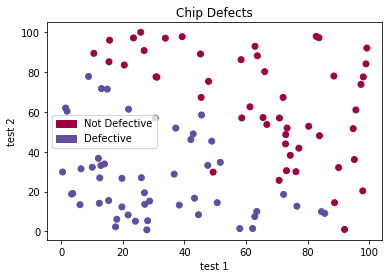

In [75]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

cmap = plt.cm.Spectral
plt.scatter(X[0,:], X[1,:], c=Y, cmap=cmap)
plt.xlabel('test 1')
plt.ylabel('test 2')

plt.legend(handles=[
    mpatches.Patch(color=cmap(0), label='Not Defective'),
    mpatches.Patch(color=cmap(cmap.N), label='Defective')
])

plt.title("Chip Defects")
plt.show()

In the above figure, we can see that the data appears (more or less) linearly separable, meaning that, in the case of $n=2$, we can find a straight line that effectively separates the two classes. Recall that Logistic Regression finds linear partitions of the feature space.  Since the data looks linearly separable, this means that the problem is suitable for Logistic Regression. If the data were not linearly separable, you would not expect Logistic Regression to produce an accurate model, and therefore, you would know to try other machine learning techniques instead. That is why it is important to understand your data before building anything. Later in this assignment, we will look at data that is not linearly separable.

### 3.4 Training the Model (Running Gradient Descent)

Finally, let's run Gradient Descent and train our model!  Run the code below which executes Gradient Descent. We have picked a learning rate that works well for this problem.  We will discuss how to choose the learning rate in a future lecture.

In [76]:
w, b, costs = gradient_descent(X, Y, 80000, 0.001182)

# Expected final cost: 0.22623328858976322
print('Final cost: {0}'.format(costs[-1]))
print()

# Expected output: 
# [[-0.05769606]
#  [-0.06118479]]
print(w)
print()

# Expected output: 5.410521971317577
print(b)

Iteration 0 - Cost: 0.6931471805599453
Iteration 5000 - Cost: 0.5153942149026436
Iteration 10000 - Cost: 0.440558018936474
Iteration 15000 - Cost: 0.3909357144965964
Iteration 20000 - Cost: 0.3560422585060177
Iteration 25000 - Cost: 0.33024137268992865
Iteration 30000 - Cost: 0.31037166132704036
Iteration 35000 - Cost: 0.2945626967161872
Iteration 40000 - Cost: 0.2816498643485951
Iteration 45000 - Cost: 0.2708744549654535
Iteration 50000 - Cost: 0.2617224818540788
Iteration 55000 - Cost: 0.25383385024673455
Iteration 60000 - Cost: 0.2469488831015241
Iteration 65000 - Cost: 0.24087557983295796
Iteration 70000 - Cost: 0.23546885895347922
Iteration 75000 - Cost: 0.2306169860249193
Final cost: 0.22623328858976322

[[-0.05769606]
 [-0.06118479]]

5.410521971317577


### 3.5 Visualize The Cost During Training

For interest sakes, let's see how the cost changed as Gradient Descent progressed. In practice, you want to keep an eye on this as training takes place (which could be hours to days to weeks) to ensure that the cost is actually going down.

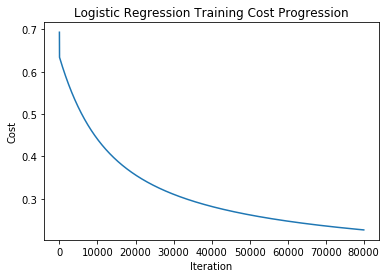

In [37]:
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title("Logistic Regression Training Cost Progression")
plt.show()


### 3.6 Making predictions with the model

Now that you have trained the model, you can use it to make predictions! It's as simple computing the hypothesis function $A = \sigma(w^T X + b)$ using our trained parameters, and new data.  And we already wrote this Python function in Section 2.3!

There is one more thing to do though. Recall that although we use Logistic Regression for binary classification, the model still outputs a continuous value **between** 0 and 1. When using the model for prediction, we need to round its output 0 or 1.

Complete the following code to build a Python function to perform predictions using the trained model parameters.

**Hint**: You may want to use the function [np.rint()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.rint.html)

In [77]:
# GRADED FUNCTION: predict

def predict(X, w, b):
    """ Use the Logistic Regression Model to make predictions
    
    Inputs:
        X: NumPy array (n, m) of feature data
        w: NumPy array (n, 1) of trained parameters w
        b: float for trained bias parameter
    
    Returns:
        NumPy array (m, ) of predictions.  Values are 0 or 1.
    """
    ### START CODE HERE ### (1 line of code)
    y_pred = np.rint(sigmoid(np.matmul(w.T,X) + b))
    ### END CODE HERE ###
    
    return y_pred

In [78]:
# Let's try making predictions on 4 new samples
new_data = np.array([[59.30, 61.80, 77.68,  9.35],
                     [72.73, 68.96, 17.92, 35.19]])

# Expected Output: [[0. 0. 0. 1.]]
print(predict(new_data, w, b))

[[0. 0. 0. 1.]]


Congratulations! You have successfully written code to train a Logistic Regression model, and used the model to predict whether a chip is defective! You're done... no wait!

**Wait!**

Before you run off to your manager to say that you are now ready to predict which chips should be thrown in the trash, how confident are you in your model? I mean, if your model isn't very accurate, you'll end up costing the company lots of money by throwing away good chips, or worse yet, let a bunch of bad chips end up in iPhones that reach the hand of the users.  And boy, that would be a bad look for Apple! Here is a [case](https://en.wikipedia.org/wiki/IPhone_8#Issues) where iPhones with defective logic boards made it market.

We need to assess the quality of our trained model.  In real Deep Learning applications, this is just the starting point.  Much of developing Deep Learning applications is in iteratively assessing your model, and finding ways to improve it. This is a big topic which we will look into during the second half of the course. For now, let's look at a couple simple ways to assess the quality of the model you just trained.

### 3.7 Visualizing the Decision boundary

Logisitic Regression is basically determining a line (for data with 2 features), as defined by the learned parameters, that separates the feature space into two partitions. The model will then hypothesize that all points in one partition (i.e. on one side of the line) will fall into the same class (e.g. defective). How *good* of a decision boundary does our trained model produce?

Mathematically, the decision boundary is the set of points in the feature space where the model predicts a value of 0.5.  Therefore, the line for the decision boundary is simply the line that satisfies:

$$ \sigma(w_0x_0 + w_1x_1 + b) = 0.5 $$

Convince yourself that rearranging the above to solve for $x_1$ yields:

$$ x_1 = -\frac{w_0x_0 + b}{w_1} $$

We have written the function *plot_decision_boundary* for you and you can simply call it below. 



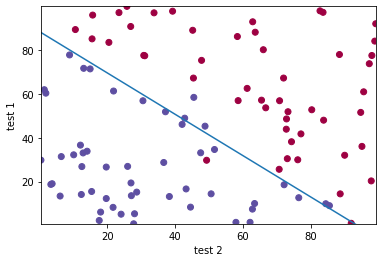

In [79]:
def plot_decision_boundary(X, Y, w, b):
    """ Plot decision boundary for 2D data
    
    Inputs:
        X: NumPy array (2, m) of feature data
        Y: NumPy array (m,)   of label data
        w: NumPy array (n, 1) of trained parameters w
        b: float for the bias parameter
    """
    # Plot the original data
    plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.Spectral)
    
    # Plot the decision boundary line
    # Pick the extremes of x_0 (and go beyond a little bit)
    # Compute x_1 for these values according to the decision
    # boundary equation, and plot the line
    x_0 = np.array([min(X[0,:]) - 1, max(X[0,:]) + 1])
    x_1 = - (w[0] * x_0 + b) / w[1]
    plt.plot(x_0, x_1, label = "Decision_Boundary")

    # scale the plot and other formatting
    axes = plt.gca()
    axes.set_xlim([min(X[0,:]),max(X[0,:])])
    axes.set_ylim([min(X[1,:]),max(X[1,:])])
    plt.ylabel('test 1')
    plt.xlabel('test 2')
    plt.show()
    
plot_decision_boundary(X, Y, w, b)

Hopefully you can see that the model does a pretty good job of putting all the red dots on one side of the line and blue dots on the other side. There are some dots that are on the "wrong" side, but if you look closely, you will see that there is no linear line that can perfectly separate the two classes.  This is often the case in practice for various reasons such as noise in the data, or a relationship that is not perfectly captured by the chosen features, or a relationship that is not perfectly linearly separable, etc.

We have now qualitatively checked that our trained model seems to do pretty well.

### 3.8 Measuring Accuracy

Let's also look at how we can quantitatively assess our trained model. One common metric is accuracy.  Given a set of feature data $X$ with known labels $Y$, how accurate is the model's predictions? Can our model achieve 100% accuracy?

$$ accuracy = \frac{correct\_predictions}{all\_predictions} $$

Complete the following code to calculate the accuracy of predictions using a vectorized implementation (don't use loops). Specifically:

- Make predictions on $X$ using the trained model to get $Y_{predicted}$
- Compare $Y_{predicted}$ to the actual known labels $Y$ and compute the $accuracy$


**Hints**: There are a number of ways to do this but here are some possibly useful tips

- Boolean operations work on NumPy arrays.  For example, if $A$ and $B$ are arrays, $A == B$ will perform the element-wise boolean comparison
- In Python and NumPy, performing arithmetic operations on boolean values (True/False) will treat the value True as numeric 1 and the value False as numeric 0.  Therefore, you may want to use [np.sum()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) and/or [np.mean()](https://docs.scipy.org/doc/numpy/reference/generated/numpy.mean.html) to help compute accuracy. You could also cast the Booleans to floats first if you want.

In [84]:
# GRADED FUNCTION: compute_accuracy

def compute_accuracy(X, Y, w, b):
    """ Compute the accuracy of a trained Logistic Regression 
        model described by its trained parameters

    Inputs:
        X: NumPy array (n, m) feature data
        Y: NumPy array (m, ) known labels for feature data X
        w: NumPy array (n, 1) trained model parameters w
        b: float for trained bias parameter
    
    Returns:
        float between 0 and 1 denoting the accuracy of the
        Logistic Regression model 
    """

    ### START CODE HERE ### (2-3 lines of code)
    Y_predicted = predict(X,w,b)
    accuracy = np.sum(Y_predicted == Y) / Y.shape[0]
    ### END CODE HERE ###

    return accuracy

Let's compute the accuracy of our model using the same data that we used for training.

In [85]:
accuracy = compute_accuracy(X, Y, w, b)
print('Accuracy: {0}'.format(accuracy))


Accuracy: 0.93


93% accuracy sounds pretty good!  At this point, it is easy to fool ourselves into thinking that our model is very accurate.  But all we know is that the model is accurate on the data on which it was trained. If you think about it, the model was optimized using this data, so we sure would hope that the model does making predictions on it! But how well does our model generalize to data that it hasn't seen before?  We will talk about this topic more later in the course and in future assignments. But not to be disheartened, having high accuracy on your training data is almost always a pre-requesite to achieving high accuracy on new data!  

There are other metrics aside from accuracy.  For example sensitivity and specificity. Perhaps in this scenario, you care a lot about false positives - i.e. you dont want a good chip being classified as bad and lose money that way.  Or maybe you actually care more about false negatives meaning you are more worried about bad chips being deemed as good and making its way to market.  Thinking about the right metric to monitor is important and we will talk about this more later in class.

## 4 Try different Hyperparameters

We've heard briefly in class that the number of training iterations, and learning rate are called Hyperparameters.  Hyperparameters are another set of parameters (so as not to be confused with learned parameters of the model itself) that we will ultimately need to tune. In other words, how do we choose suitable values?  We will cover this topic in the second half of the course.  For now, we have picked values that work well for this assignment and data set.

As an exercise, let's try changing the number of iterations and learning rate and see what happens.  For convenience, we have defined the following function *train_and_assess()* which collects the pertinent code you wrote earlier. You can simply use it in the following sections.


In [86]:
def train_and_assess(X, Y, num_iterations=80000, learning_rate=0.001182):
    """ Trains a Logistic Regression model, then access its accuracy
        and decision boundary on the training data.
    
    Inputs:
        X: NumPy array (n, m) feature data
        Y: NumPy array (m, ) known labels for feature data X
        num_iterations: int for number of gradient descent iterations
        learning_rate: float for gradient descent learning rate
    """
    
    # Train model
    w, b, costs = gradient_descent(X, Y, num_iterations, learning_rate)
    print('Final Cost: {0}'.format(costs[-1]))

    # Plot Cost during training
    plt.plot(costs)
    plt.xlabel('Iteration')
    plt.ylabel('Cost')
    plt.title("Logistic Regression Training Cost Progression")
    plt.show()

    # Plot decision boundary 
    plot_decision_boundary(X, Y, w, b)

    # Print accuracy
    accuracy = compute_accuracy(X, Y, w, b)
    print('Accuracy: {0}'.format(accuracy))

### 4. 1 Different Number of Training Iterations

Leave the learning rate at 0.001182 and try different values of training iterations. See how this affects the decision boundary and accuracy.  Suggested values to try are 1000, 10000, 300000. Or try your own value! You should see that the longer the training goes, the better the fit, and hence accuracy.  While this is generally true for training data accuracy, we will see in the future that this doesn't mean that the model will become more accurate on data that it has never seen before.  


Iteration 0 - Cost: 0.6931471805599453
Final Cost: 0.6060439533413235


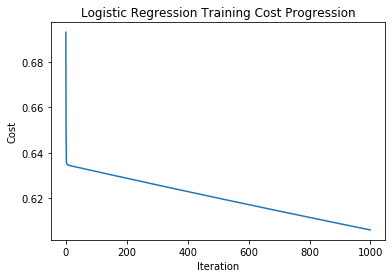

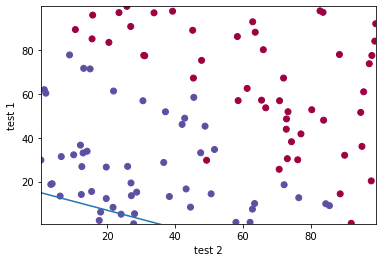

Accuracy: 0.53


In [87]:
train_and_assess(X, Y, num_iterations=1000)

Iteration 0 - Cost: 0.6931471805599453
Iteration 5000 - Cost: 0.5153942149026436
Final Cost: 0.440569999618829


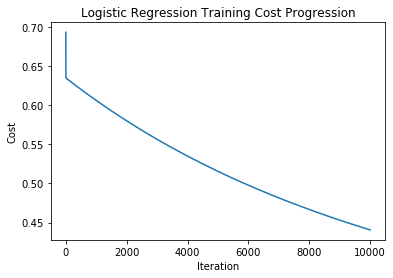

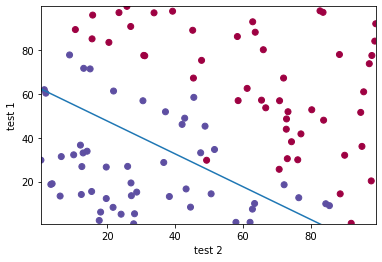

Accuracy: 0.83


In [88]:
train_and_assess(X, Y, num_iterations=10000)

Iteration 0 - Cost: 0.6931471805599453
Iteration 5000 - Cost: 0.5153942149026436
Iteration 10000 - Cost: 0.440558018936474
Iteration 15000 - Cost: 0.3909357144965964
Iteration 20000 - Cost: 0.3560422585060177
Iteration 25000 - Cost: 0.33024137268992865
Iteration 30000 - Cost: 0.31037166132704036
Iteration 35000 - Cost: 0.2945626967161872
Iteration 40000 - Cost: 0.2816498643485951
Iteration 45000 - Cost: 0.2708744549654535
Iteration 50000 - Cost: 0.2617224818540788
Iteration 55000 - Cost: 0.25383385024673455
Iteration 60000 - Cost: 0.2469488831015241
Iteration 65000 - Cost: 0.24087557983295796
Iteration 70000 - Cost: 0.23546885895347922
Iteration 75000 - Cost: 0.2306169860249193
Iteration 80000 - Cost: 0.22623245352193602
Iteration 85000 - Cost: 0.2222457012545943
Iteration 90000 - Cost: 0.21860069756438572
Iteration 95000 - Cost: 0.2152517686430309
Iteration 100000 - Cost: 0.21216128308612014
Iteration 105000 - Cost: 0.209297933890655
Iteration 110000 - Cost: 0.20663544519265156
Iterat

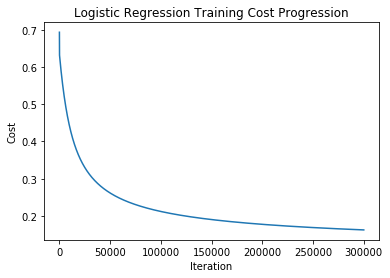

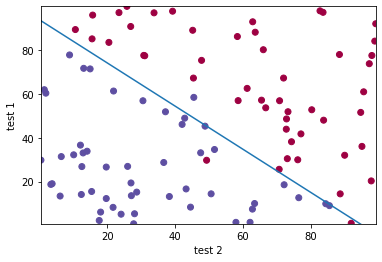

Accuracy: 0.97


In [48]:
train_and_assess(X, Y, num_iterations=300000)

### 4.2 Different Learning Rate

The learning rate dictates the rate of change in the parameters on each iteration of training. 

#### 4.2.1 Learning Rate too small

Try a smaller training rate like 0.0001.  What you should see is that the cost reduces at a much slower rate.


Iteration 0 - Cost: 0.6931471805599453
Iteration 5000 - Cost: 0.6222733228767586
Iteration 10000 - Cost: 0.6102652106047033
Iteration 15000 - Cost: 0.5987498881646406
Iteration 20000 - Cost: 0.5877062661443969
Iteration 25000 - Cost: 0.5771137180740221
Iteration 30000 - Cost: 0.5669521497512449
Iteration 35000 - Cost: 0.5572020548174487
Iteration 40000 - Cost: 0.5478445577416057
Iteration 45000 - Cost: 0.5388614454464379
Iteration 50000 - Cost: 0.530235188836978
Iteration 55000 - Cost: 0.5219489554769088
Iteration 60000 - Cost: 0.513986614612204
Iteration 65000 - Cost: 0.5063327356732412
Iteration 70000 - Cost: 0.49897258130316224
Iteration 75000 - Cost: 0.4918920958679521
Final Cost: 0.4850792273857302


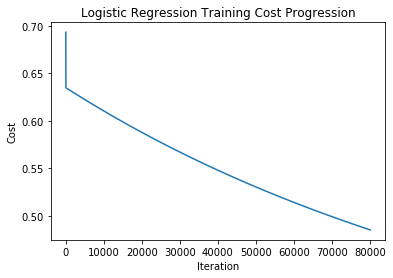

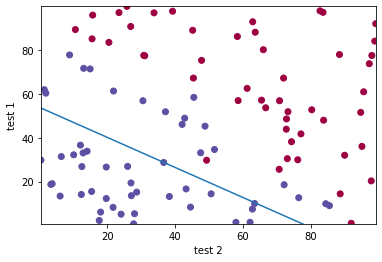

Accuracy: 0.82


In [89]:
train_and_assess(X, Y, learning_rate=0.0001)

#### 4.2.2 Learning Rate too big

Now try a larger learning rate of 0.002, but set the number of iterations to 100.  We choose a smaller number of iterations just so we can get a clearer plot of the change in cost.  You should see the cost oscillating but still trending downwards.  The oscillating behaviour also slows down the rate at which the cost decreases.  Do you remember from lecture why this oscillating behaviour occurs?

Iteration 0 - Cost: 0.6931471805599453
Final Cost: 0.6852303906438636


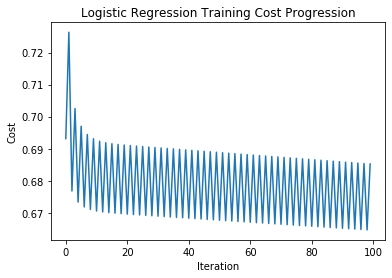

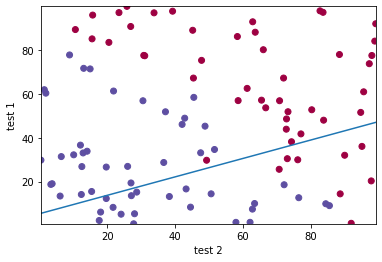

Accuracy: 0.62


In [51]:
train_and_assess(X, Y, num_iterations=100, learning_rate=0.002)

## 5. Data that is not linearly separable

In this assignment, you have built a Logistic Regression training and prediction system!  We have learned that Logistic Regression works well for data that is linearly separable. However, many problems exist where this isn't the case. In other words, the decision boundary in those cases isn't a straight line (for 2D data).  This is motivation for using Neural Networks (Assignment 2) which has the power to learn non-linear decision boundaries.  And furthermore, Deep Neural Networks (Assignment 3) have the power to learn even more complex non-linearities.  

To convince you, we have prepared a few data sets that are not linearly separable.  Try training your Logistic Regression model on them and see what kind of accuracy you can get.  You should see that when restricted to a linear decision boundary, you cannot get high accuracy.

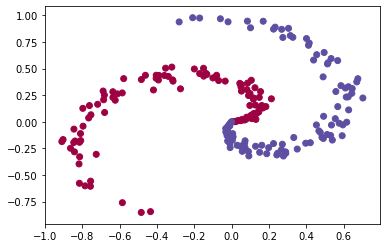

Iteration 0 - Cost: 0.6931471805599452
Iteration 5000 - Cost: 0.39517314659849645
Final Cost: 0.395172053274774


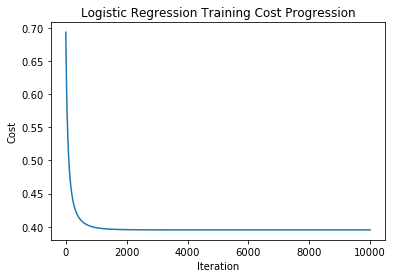

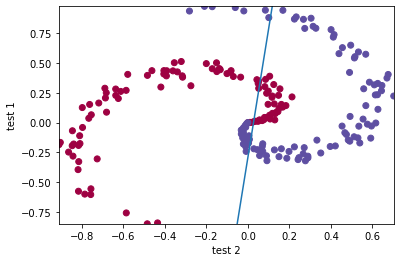

Accuracy: 0.7


In [56]:
from a1_tools import load_swirls, load_noisy_circles, load_noisy_moons, load_partitioned_circles

# Uncomment only one of these lines to load the desired data set
X, Y = load_swirls()
#X, Y = load_noisy_circles()
#X, Y = load_noisy_moons()
#X, Y = load_partitioned_circles()


# Plot the data
plt.scatter(X[0,:], X[1,:], c=Y, cmap=plt.cm.Spectral)
plt.show()

# Now train and assess.  NOTE: The default learning rate and number of
# training iterations were tuned for our linearly separable data set
# you may want to play around with those numbers.
train_and_assess(X, Y, num_iterations=10000, learning_rate = 0.2)

## 6. Conclusion

Congratulations on completing your first assignment! It was a long one, but we have covered a lot of material that will let us move faster in the following assignments.

In this assignment, you have:

- Learned to use various practical tools used in Deep Learning implementations such as Python, Jupyter Notebooks, NumPy, matplotlib.
- Learned to use NumPy to work with arrays, use its various functions, and uses its various mechanisms such as vectorization and Broadcasting.
- Built a complete Logistic Regression system that that can be used to train on data of any number of features!
- Explored some of the considerations when training (e.g. choosing hyperparameters)
- Explored qualitative and quantitative techniques for assessing the quality of your trained model

In the next assignment, you will follow the same framework to build your first Neural Network!


## 7 Summary of Graded Functions

- non_vectorized_sigmoid()
- sigmoid()
- initialize_parameters()
- hypothesis()
- compute_cost()
- compute_gradients()
- gradient_descent()
- predict()
- compute_accuracy()


Thank you to Singulos Research for feedback, suggestions, and testing of this assignment.